# I] Import and options


In [1]:
import pandas, numpy
# import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [2]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [3]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] DL data

In [4]:
%%time
path = input_file_directory + "seahorse_data/per_exp1nonorm2.csv"
per_exp1nonorm = pandas.read_csv(path, sep = ";")
per_exp1nonorm = per_exp1nonorm.rename(columns = {'Unnamed: 0':'Time'})
per_exp1nonorm = per_exp1nonorm.apply(lambda x: x.str.replace(',','.'))
per_exp1nonorm = per_exp1nonorm.astype(float)
print(per_exp1nonorm.shape)
per_exp1nonorm.head(2)

(15, 61)
Wall time: 31.9 ms


,Time,B02,C02,D02,E02,F02,G02,B07,C07,D07,...,D06,E06,F06,G06,B11,C11,D11,E11,F11,G11
0,1.31,422.70,168.94,228.45,252.12,165.49,185.74,411.18,239.24,351.35,...,274.06,246.46,189.89,209.72,143.24,161.50,185.35,137.75,129.56,93.61
1,7.76,404.23,159.58,219.63,212.26,136.08,178.62,396.62,248.14,340.97,...,270.89,264.96,192.17,216.51,140.30,166.59,182.11,134.05,127.94,82.77


In [5]:
#define the wells for each condition
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03','G03']
ev = ['B04','C04','D04','E04','F04','G04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06','G06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','C08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11','G11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.
findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


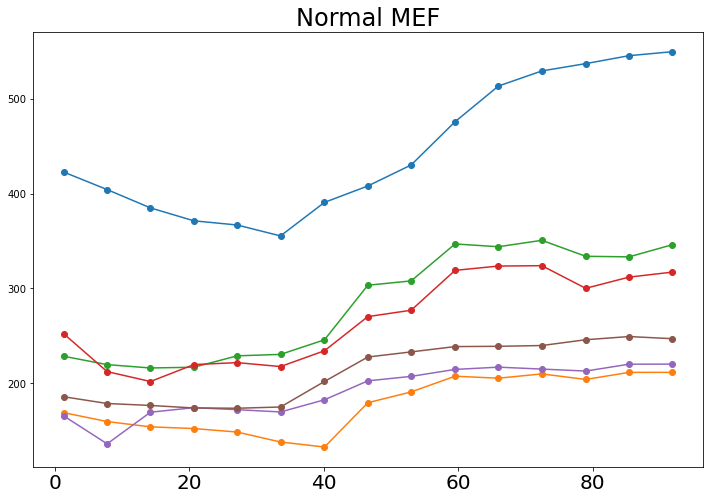

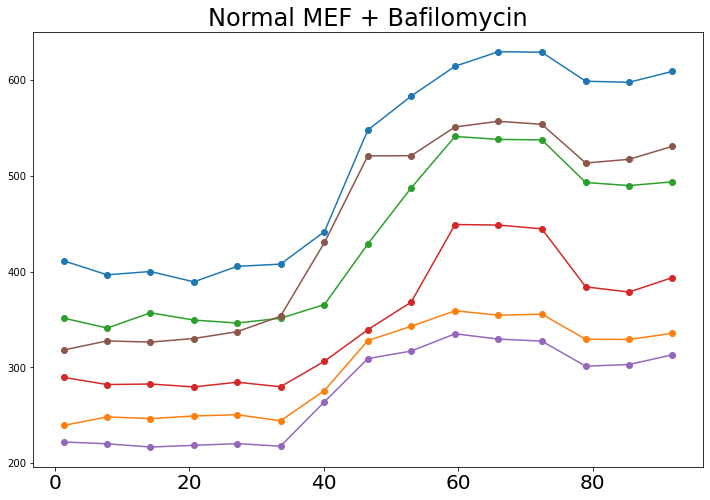

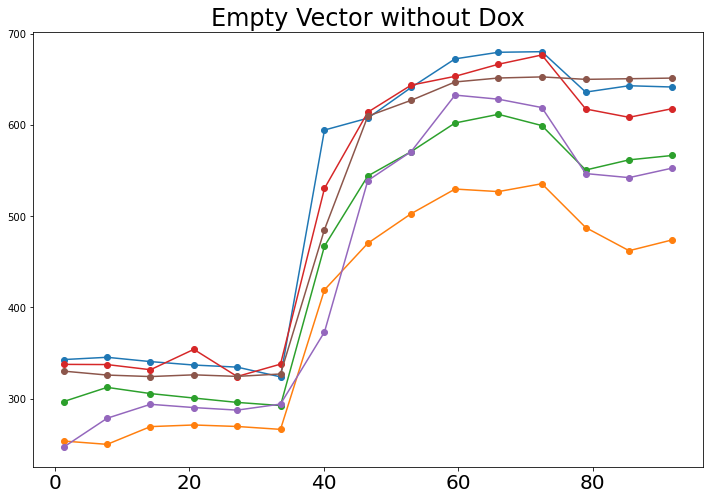

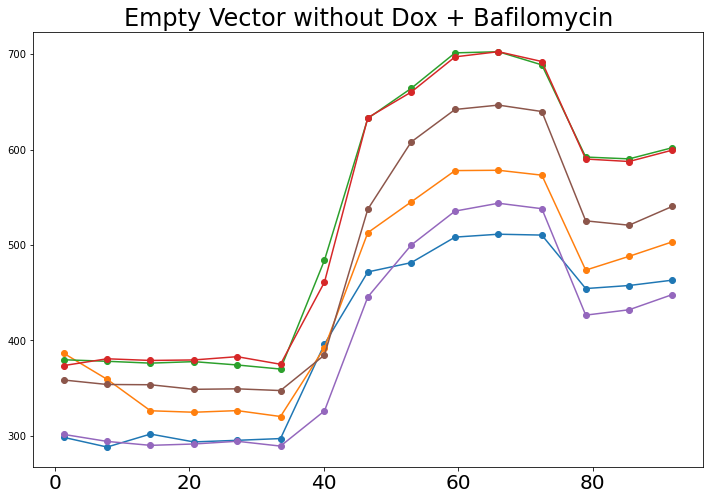

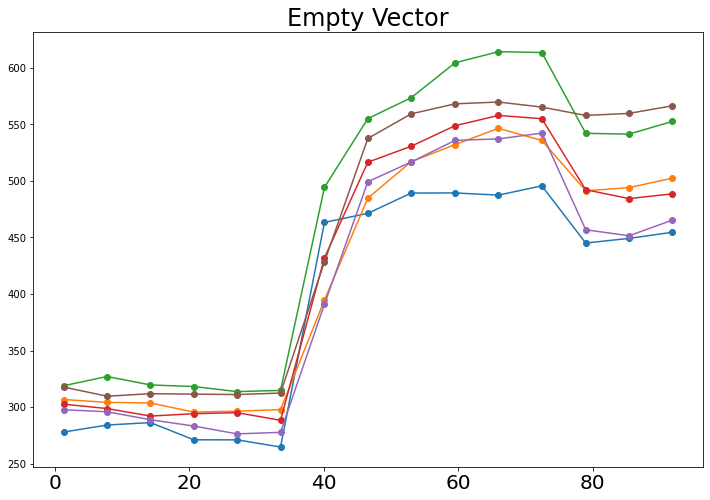

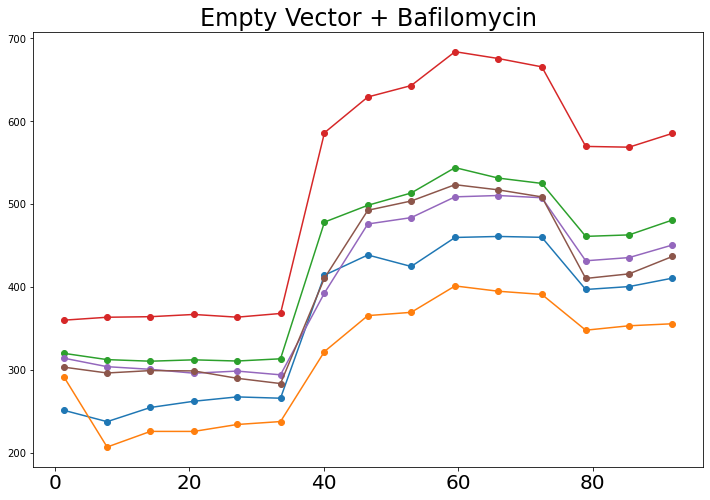

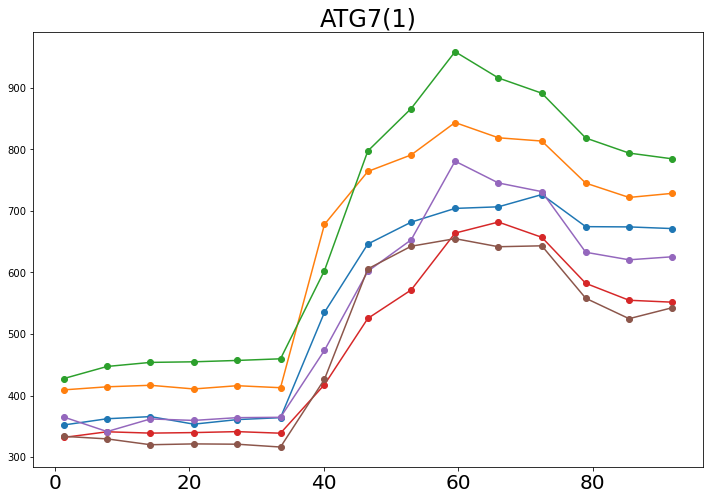

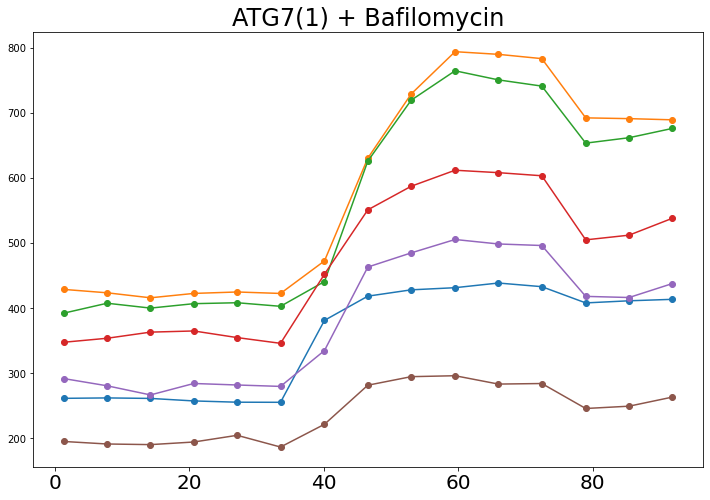

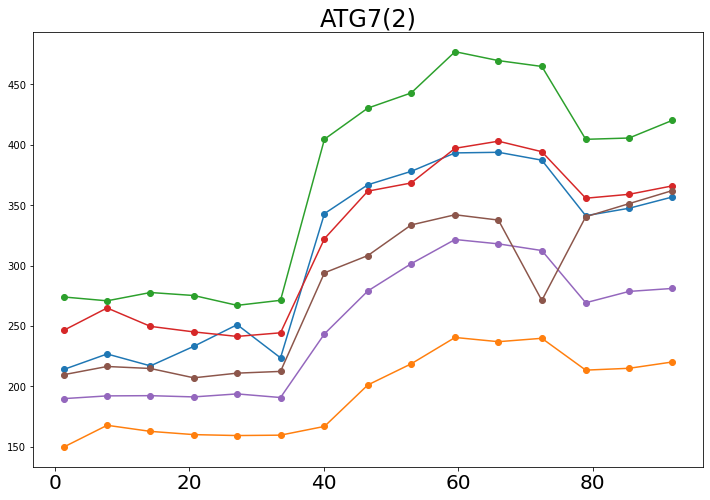

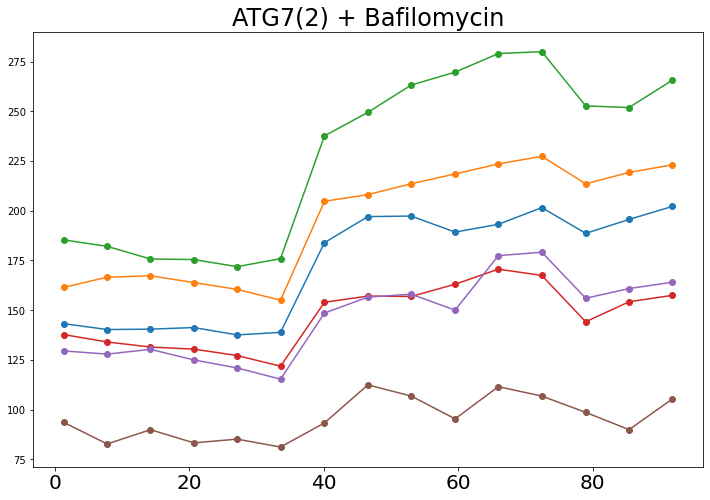

<Figure size 864x576 with 0 Axes>

In [6]:
#Visualization of all data
all_data = [[normal, 'Normal MEF'], [normal_baf, 'Normal MEF + Bafilomycin'],
            [ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##graph
    name = data[1]
    plt.plot(per_exp1nonorm['Time'], per_exp1nonorm[data[0]], 'o-')
    plt.title(name)
   
    plt.show()
    plt.clf()
    print()

In [7]:
#define the wells for each condition after removing bad wells 
normal = ['B02','C02','D02','E02','F02','G02']
ev_nodox = ['B03','C03','D03','E03','F03']
ev = ['B04','D04','E04','F04']
wt1 = ['B05','C05','D05','E05','F05','G05']
wt2 = ['B06','C06','D06','E06','F06']

normal_baf = ['B07','C07','D07','E07','F07','G07']
ev_nodox_baf = ['B08','D08','E08','F08','G08']
ev_baf = ['B09','C09','D09','E09','F09','G09']
wt1_baf = ['B10','C10','D10','E10','F10','G10']
wt2_baf = ['B11','C11','D11','E11','F11']

findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


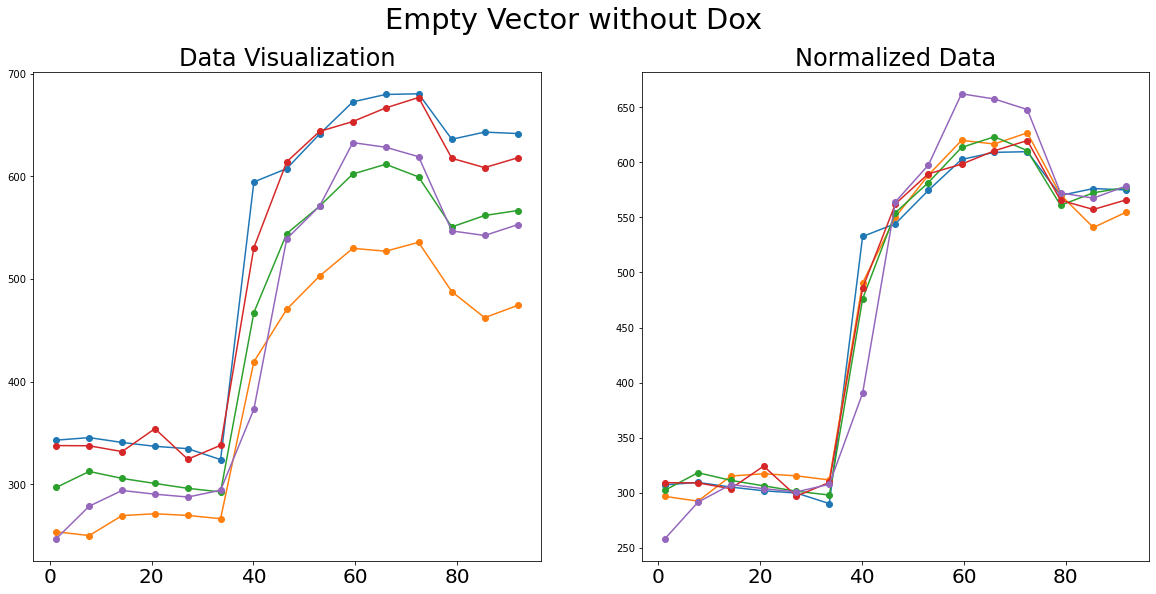

<Figure size 864x576 with 0 Axes>

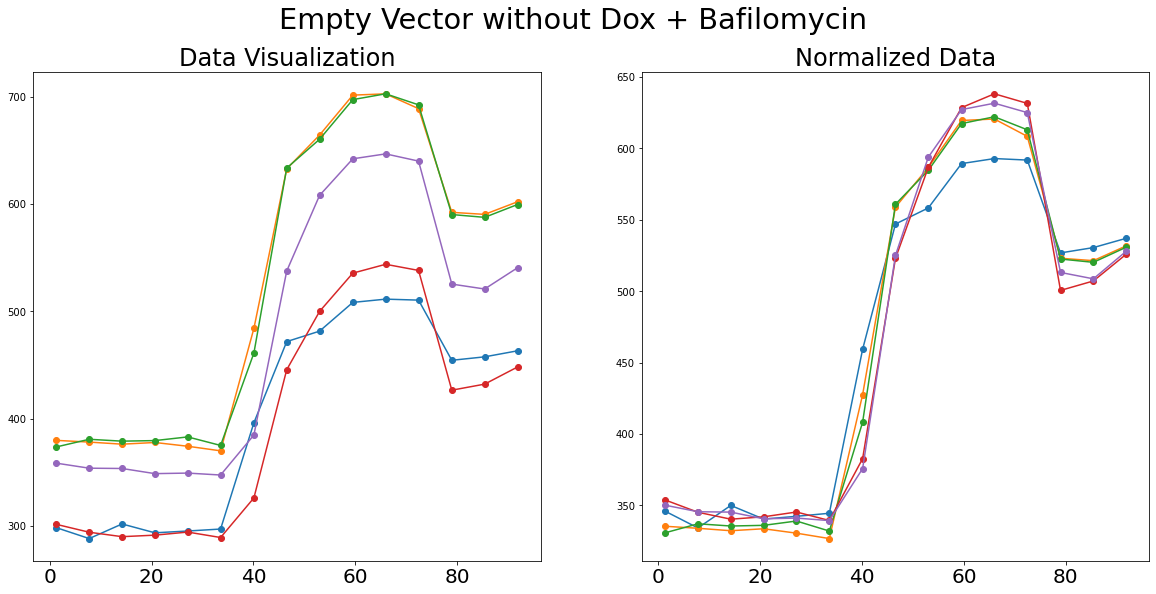

<Figure size 864x576 with 0 Axes>

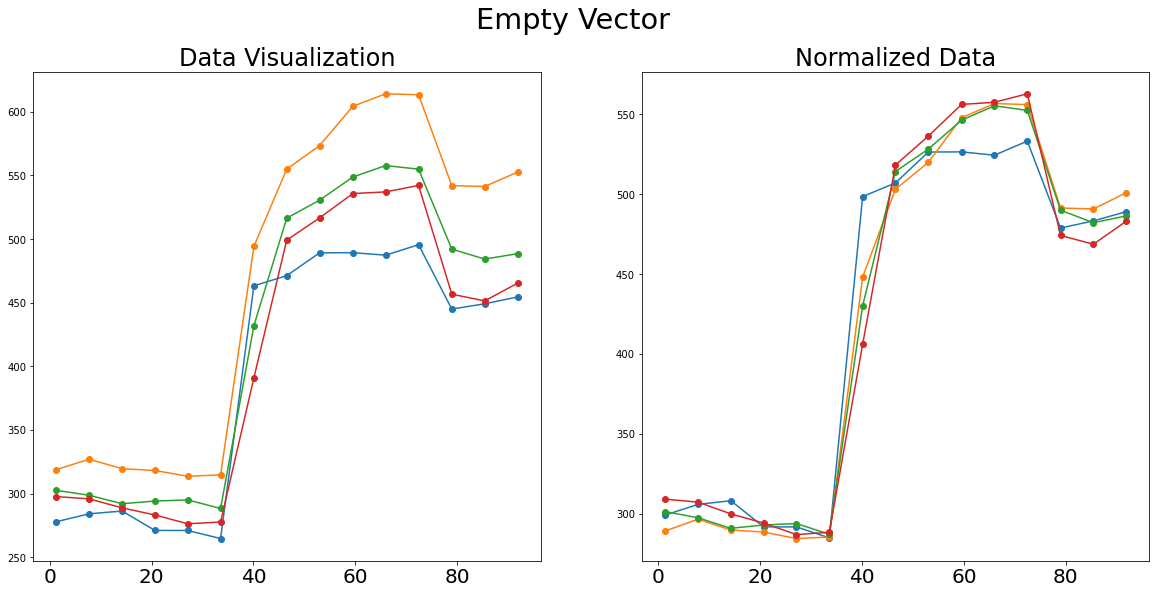

<Figure size 864x576 with 0 Axes>

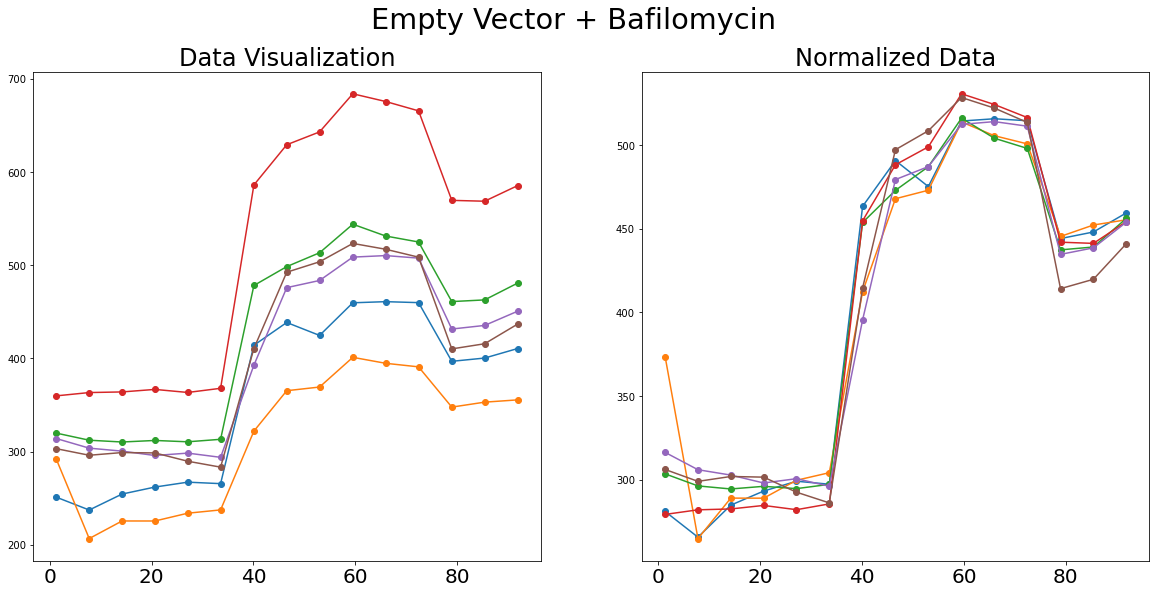

<Figure size 864x576 with 0 Axes>

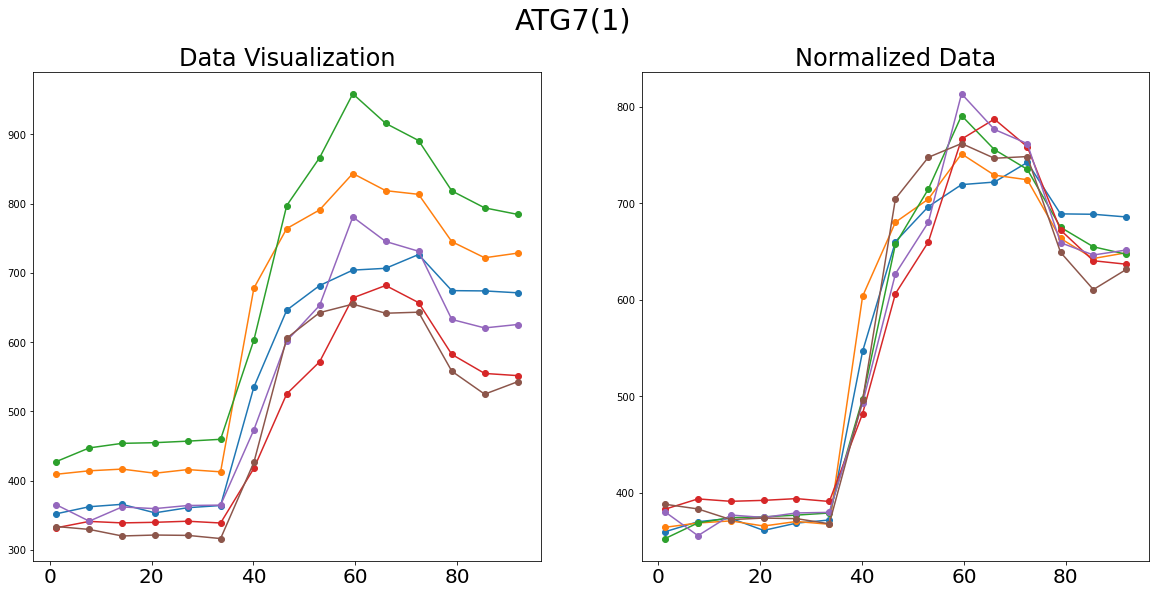

<Figure size 864x576 with 0 Axes>

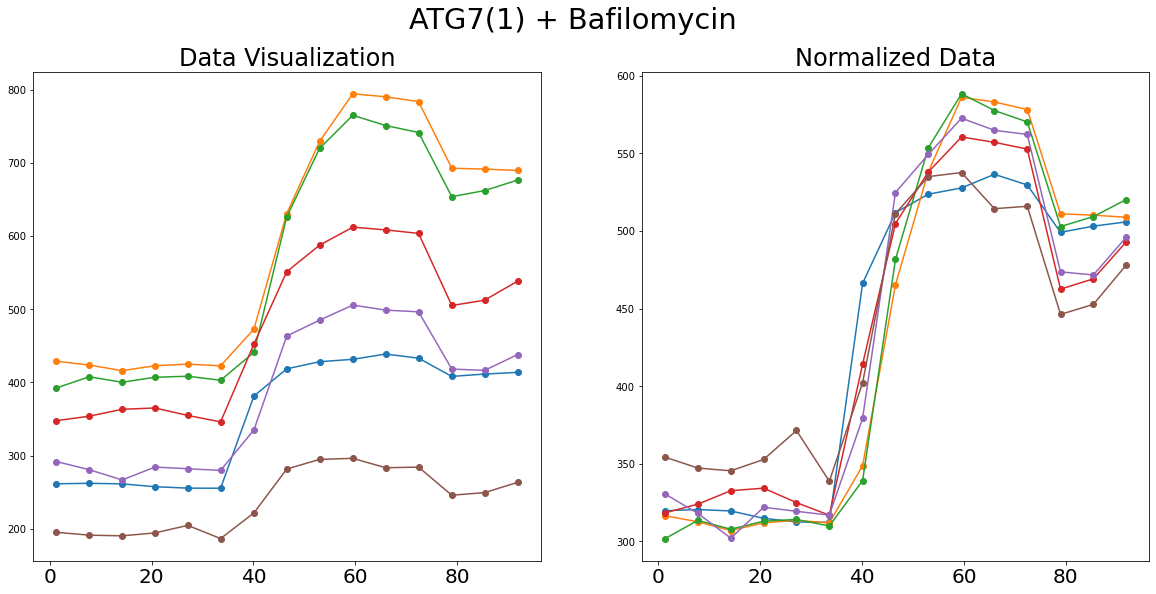

<Figure size 864x576 with 0 Axes>

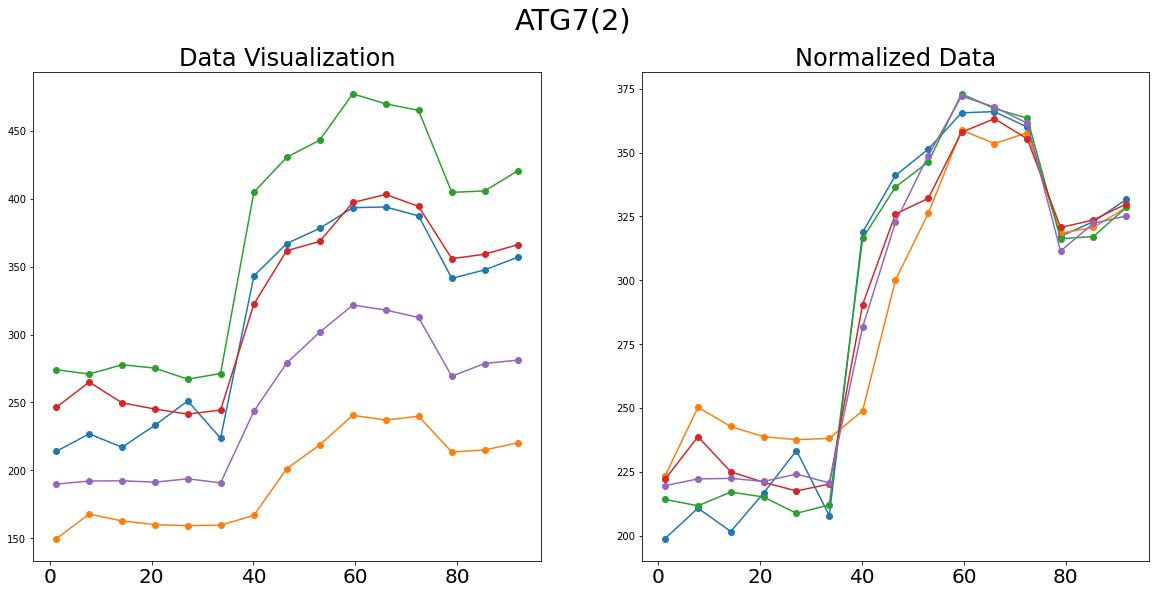

<Figure size 864x576 with 0 Axes>

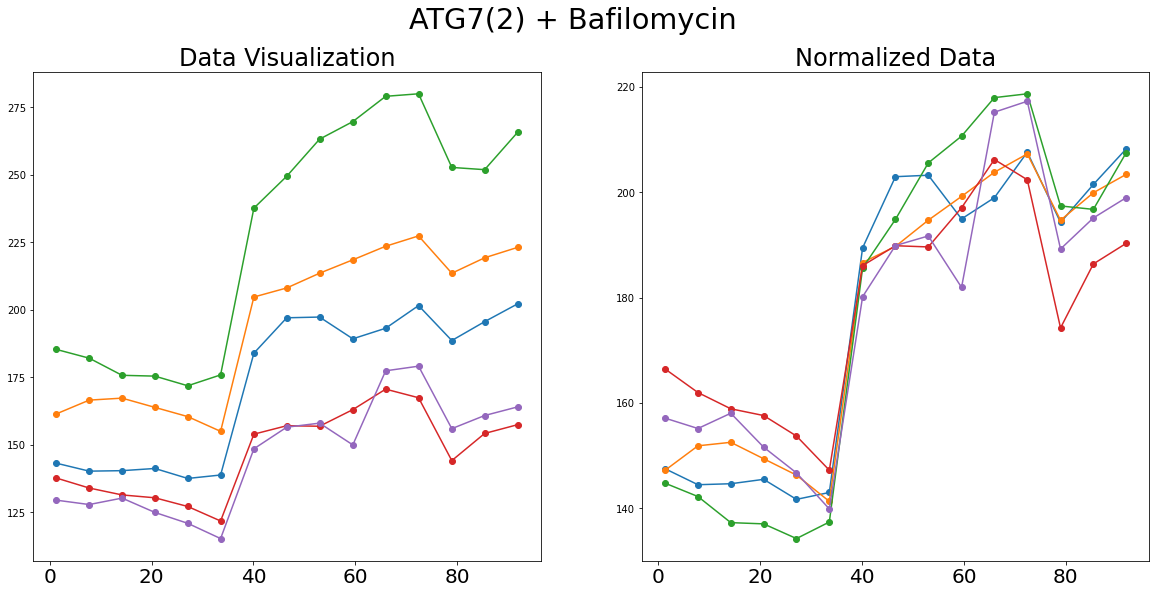

<Figure size 864x576 with 0 Axes>

In [8]:
#Normalization of the data after removing bad wells
all_data = [[ev_nodox, 'Empty Vector without Dox'], [ev_nodox_baf, 'Empty Vector without Dox + Bafilomycin'],
            [ev, 'Empty Vector'], [ev_baf, 'Empty Vector + Bafilomycin'],
            [wt1, 'ATG7(1)'], [wt1_baf, 'ATG7(1) + Bafilomycin'],
            [wt2, 'ATG7(2)'], [wt2_baf, 'ATG7(2) + Bafilomycin']]
        
for data in all_data:
    ##setting graphs
    name = data[1]
    fig, ax = plt.subplots(1,2, figsize=(20,9))
    fig.suptitle(name, fontsize="x-large")
    
    ##graph1
    ax[0].plot(per_exp1nonorm['Time'], per_exp1nonorm[data[0]], 'o-')
    ax[0].set_title("Data Visualization")
    
    ##normalization
    shift = per_exp1nonorm[data[0]].mean()
    general_mean = per_exp1nonorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    
    normalized_data = per_exp1nonorm[data[0]]/relative_mu
    
    ##graph2
    ax[1].plot(per_exp1nonorm['Time'], normalized_data, 'o-')
    ax[1].set_title("Normalized Data")
    
    plt.show()
    plt.clf()
    print()

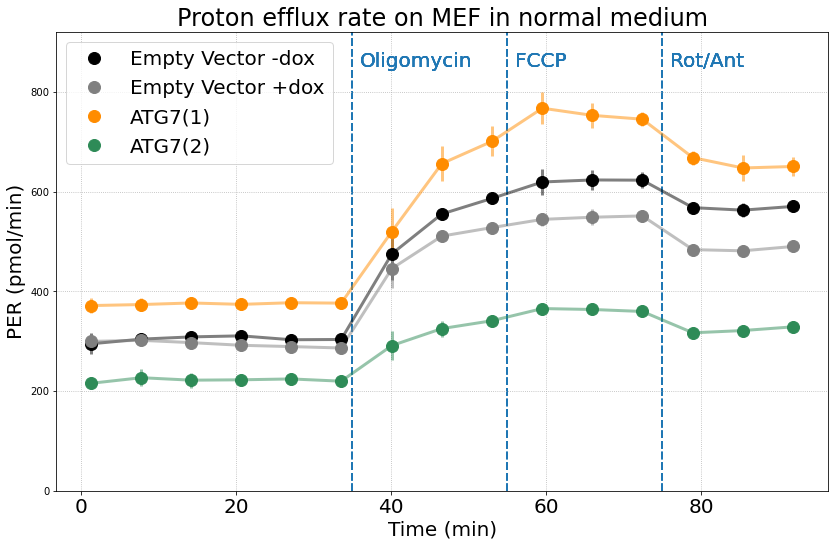

In [9]:
#Normalization of the data after removing bad wells
##WITHOUT BAFILOMYCIN
all_data = [[ev_nodox, 'Empty Vector -dox', "black"],
            [ev, 'Empty Vector +dox', 'grey'],
            [wt1, 'ATG7(1)', 'darkorange'],
            [wt2, 'ATG7(2)', "seagreen"]]


for data in all_data:
    ##setting graphs
    name_val = data[1]
    color_val = data[2]
     
    ##normalization
    shift = per_exp1nonorm[data[0]].mean()
    general_mean = per_exp1nonorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    normalized_data = per_exp1nonorm[data[0]]/relative_mu
    
    ##define mean and standard deviation
    mean = normalized_data.mean(axis=1)
    std = normalized_data.std(axis=1)
    
    ##plot graph
    plt.errorbar(per_exp1nonorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
    plt.plot(per_exp1nonorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)
    
    matplotlib.pyplot.grid(ls=':')
    
    ##add vertical lines
    matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
    matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
    matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

    ##add texts
    matplotlib.pyplot.text(36, 850, 'Oligomycin', color='tab:blue')
    matplotlib.pyplot.text(56, 850, 'FCCP', color='tab:blue')
    matplotlib.pyplot.text(76, 850, 'Rot/Ant', color='tab:blue')

    ##settings
    matplotlib.pyplot.title('Proton efflux rate on MEF in normal medium')
    matplotlib.pyplot.xlabel('Time (min)')
    matplotlib.pyplot.ylabel('PER (pmol/min)')
    matplotlib.pyplot.legend(loc=2)
    matplotlib.pyplot.ylim([0, 920])
    matplotlib.pyplot.tight_layout()

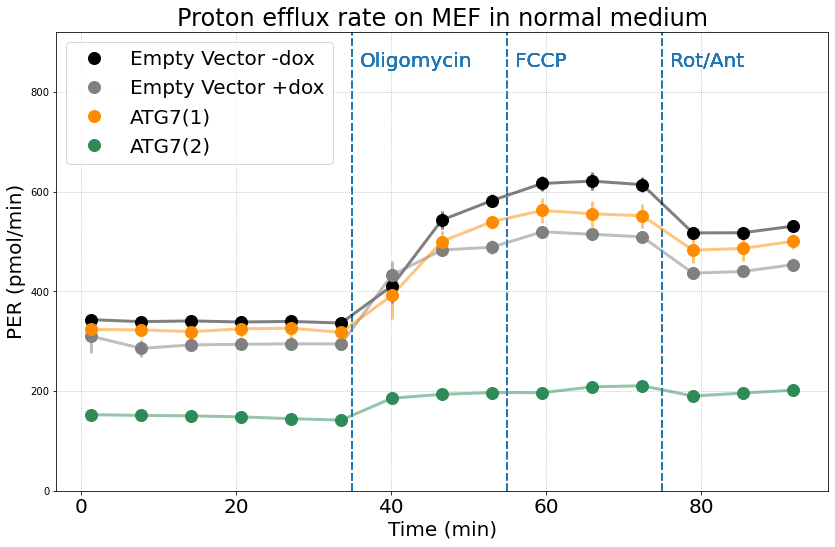

In [10]:
#Normalization of the data after removing bad wells
##WITH BAFILOMYCIN
all_data = [[ev_nodox_baf, 'Empty Vector -dox', "black"],
            [ev_baf, 'Empty Vector +dox', 'grey'],
            [wt1_baf, 'ATG7(1)', 'darkorange'],
            [wt2_baf, 'ATG7(2)', "seagreen"]]


for data in all_data:
    ##setting graphs
    name_val = data[1]
    color_val = data[2]
     
    ##normalization
    shift = per_exp1nonorm[data[0]].mean()
    general_mean = per_exp1nonorm[data[0]].mean().mean()
    relative_mu = shift/general_mean
    normalized_data = per_exp1nonorm[data[0]]/relative_mu
    
    ##define mean and standard deviation
    mean = normalized_data.mean(axis=1)
    std = normalized_data.std(axis=1)
    
    ##plot graph
    plt.errorbar(per_exp1nonorm['Time'], mean, std, lw=3, color=color_val, alpha=1/2)
    plt.plot(per_exp1nonorm['Time'], mean, 'o', color=color_val, ms=12, label=name_val, zorder=999)
    
    matplotlib.pyplot.grid(ls=':')
    
    ##add vertical lines
    matplotlib.pyplot.axvline(x=35, ls='--', lw=2, color='tab:blue', zorder=1)
    matplotlib.pyplot.axvline(x=55, ls='--', lw=2, color='tab:blue', zorder=1)
    matplotlib.pyplot.axvline(x=75, ls='--', lw=2, color='tab:blue', zorder=1)

    ##add texts
    matplotlib.pyplot.text(36, 850, 'Oligomycin', color='tab:blue')
    matplotlib.pyplot.text(56, 850, 'FCCP', color='tab:blue')
    matplotlib.pyplot.text(76, 850, 'Rot/Ant', color='tab:blue')

    ##settings
    matplotlib.pyplot.title('Proton efflux rate on MEF in normal medium')
    matplotlib.pyplot.xlabel('Time (min)')
    matplotlib.pyplot.ylabel('PER (pmol/min)')
    matplotlib.pyplot.legend(loc=2)
    matplotlib.pyplot.ylim([0, 920])
    matplotlib.pyplot.tight_layout()